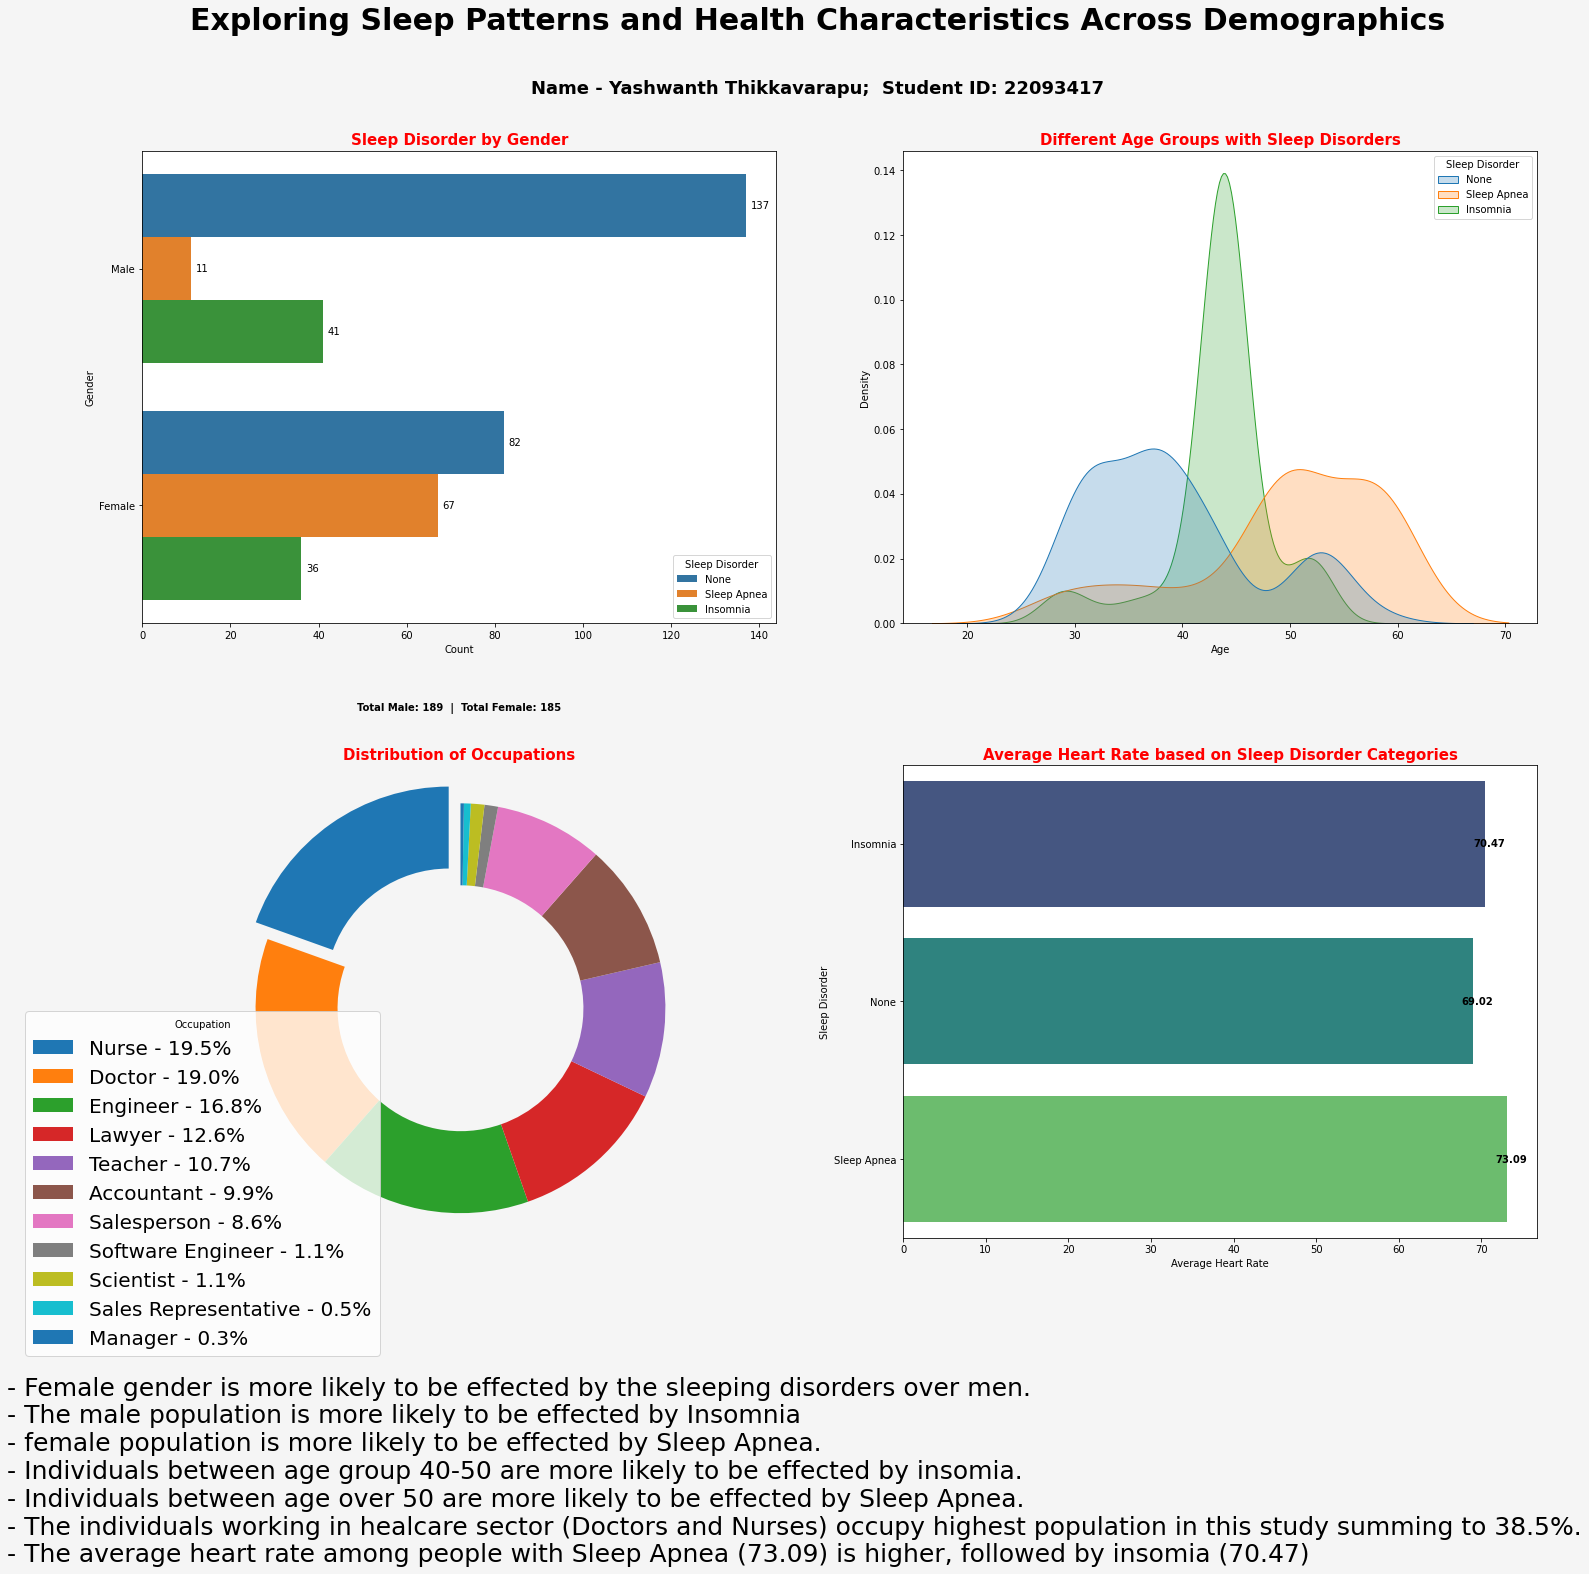

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') # https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
fig = plt.figure(figsize=(25, 20), facecolor='#F5F5F5')
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
fig.suptitle('Exploring Sleep Patterns and Health Characteristics Across Demographics', fontsize=30, color='black', fontweight='bold')
plt.figtext(0.5, 0.92, 'Name - Yashwanth Thikkavarapu;  Student ID: 22093417', ha='center', fontsize=18, color='black', fontweight='bold')
ax0 = plt.subplot(gs[0, 0])
sns.countplot(y='Gender', hue='Sleep Disorder', data=df, ax=ax0)
for p in ax0.patches:
    total_count = p.get_width()
    ax0.annotate(f'{total_count}', (total_count, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')
total_male = df[df['Gender'] == 'Male'].shape[0]
total_female = df[df['Gender'] == 'Female'].shape[0]
ax0.text(0.5, -0.18, f'Total Male: {total_male}  |  Total Female: {total_female}', ha='center', va='center', transform=ax0.transAxes, fontweight='bold')
ax0.set_xlabel('Count')
ax0.set_ylabel('Gender')
ax0.set_title('Sleep Disorder by Gender', fontsize=15, color='red', fontweight='bold')
ax1 = plt.subplot(gs[0, 1])
sns.kdeplot(x='Age', hue='Sleep Disorder', data=df, fill=True, common_norm=False, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Different Age Groups with Sleep Disorders', fontsize=15, color='red', fontweight='bold')
plt.subplots_adjust(hspace=0.3)
ax2 = plt.subplot(gs[1, 0])
occupation_counts = df['Occupation'].value_counts()
explode = [0.1 if occupation == occupation_counts.idxmax() else 0 for occupation in occupation_counts.index]
wedges, _, _ = plt.pie(occupation_counts, autopct='', startangle=90, explode=explode, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0, 0), 0.50, fc='#F5F5F5')
ax2.add_artist(centre_circle)
ax2.axis('equal')
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(occupation_counts.index, (occupation_counts / occupation_counts.sum()) * 100)]
ax2.legend(legend_labels, title='Occupation', loc='upper left', bbox_to_anchor=(-0.2, 0.5), prop={'size': 20})
ax2.set_title('Distribution of Occupations', fontsize=15, color='red', fontweight='bold')
ax3 = plt.subplot(gs[1, 1])
mean_heart_rate = df.groupby('Sleep Disorder')['Heart Rate'].mean().reset_index()
sns.barplot(x='Heart Rate', y='Sleep Disorder', data=mean_heart_rate, ci=None, palette='viridis', ax=ax3)
ax3.set_xlabel('Average Heart Rate')
ax3.set_ylabel('Sleep Disorder')
ax3.set_title('Average Heart Rate based on Sleep Disorder Categories', fontsize=15, color='red', fontweight='bold')
for p in ax3.patches:
    ax3.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), ha='center', va='center', weight='bold')
 
text = """
- Female gender is more likely to be effected by the sleeping disorders over men.
- The male population is more likely to be effected by Insomnia
- female population is more likely to be effected by Sleep Apnea.
- Individuals between age group 40-50 are more likely to be effected by insomia.
- Individuals between age over 50 are more likely to be effected by Sleep Apnea.
- The individuals working in healcare sector (Doctors and Nurses) occupy highest population in this study summing to 38.5%.
- The average heart rate among people with Sleep Apnea (73.09) is higher, followed by insomia (70.47)"""

fig.text(0.05, -0.1, text, fontsize=25, va='baseline')
plt.show()